Work Flow

1. data importing
2. data preprocessing
3. data analysis
4. data test_train split
5. model training
6. evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


data collection and analysis

In [ ]:
data_insurance = pd.read_csv('/content/insurance.csv')

In [ ]:
data_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data_insurance.shape

(1338, 7)

In [ ]:
# getting some information about the dataset
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-19-387949aef56a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_insurance['age'])


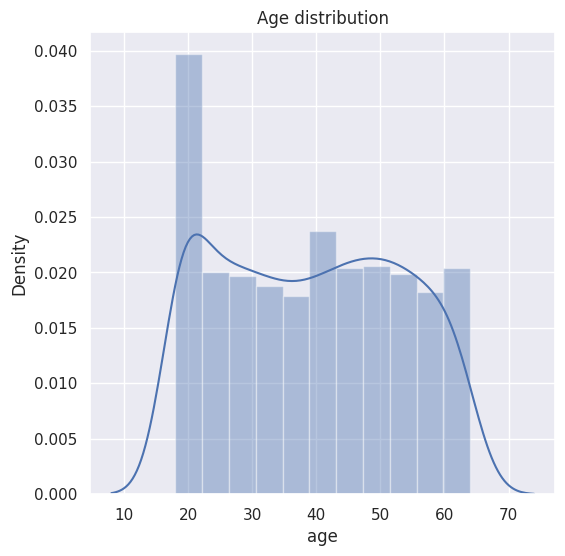

In [ ]:
#destribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data_insurance['age'])
plt.title('Age distribution')
plt.show()

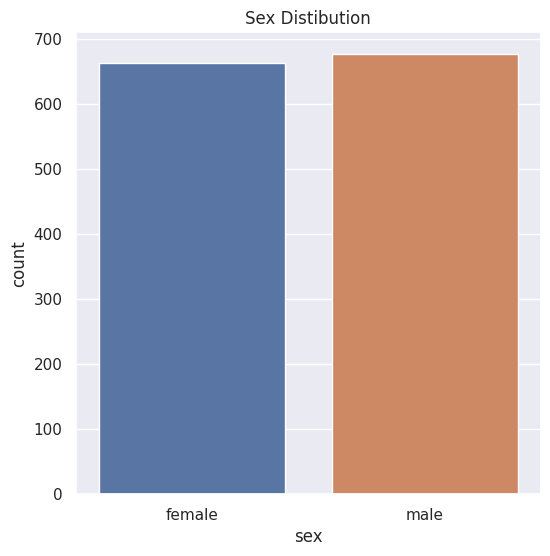

In [ ]:
#destribution of age value
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data_insurance)
plt.title('Sex Distibution')
plt.show()

In [ ]:
data_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-23-54a5298e1e5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_insurance['bmi'])


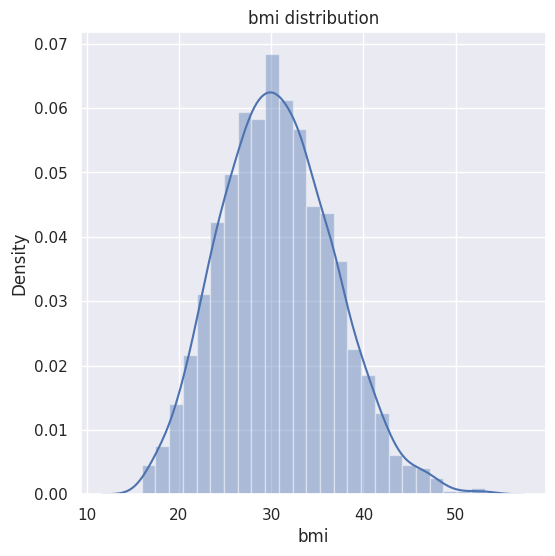

In [ ]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(data_insurance['bmi'])
plt.title('bmi distribution')
plt.show()

normal bmi range : 18.5 to 24.9

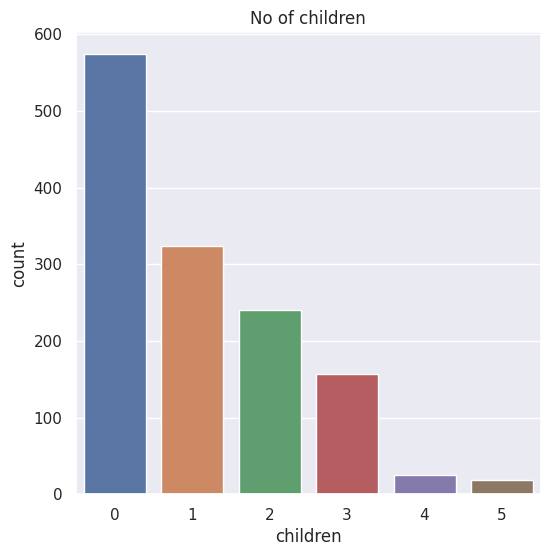

In [ ]:
# childen column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data_insurance)
plt.title('No of children')
plt.show()

In [ ]:
data_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

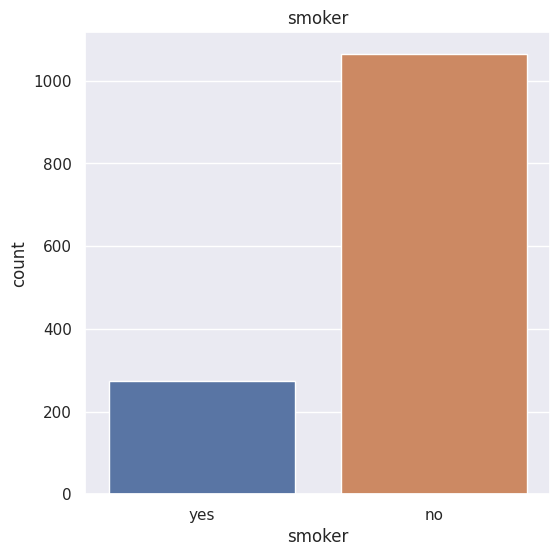

In [ ]:
#destribution of smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data_insurance)
plt.title('smoker')
plt.show()

In [ ]:
data_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

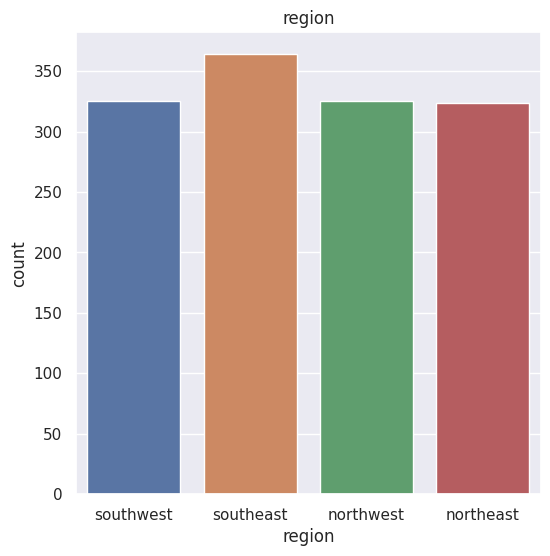

In [ ]:
#destribution of smoker
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data_insurance)
plt.title('region')
plt.show()

In [ ]:
data_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-33-30cdd647e7c7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_insurance['charges'])


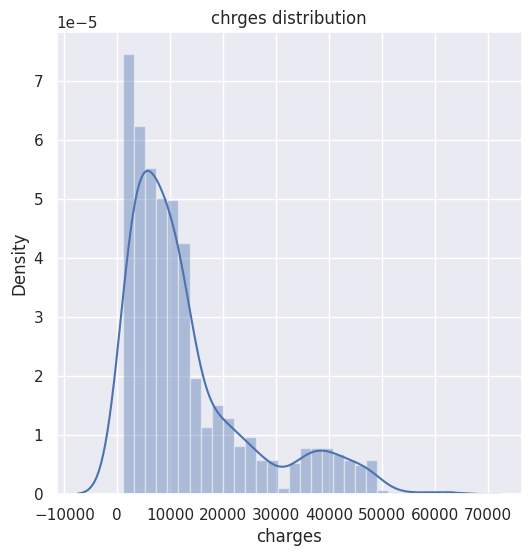

In [ ]:
#destribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data_insurance['charges'])
plt.title('charges distribution')
plt.show()

data pre-processing

encoding the categorgical features

In [ ]:
#encoding sex column
data_insurance.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [ ]:
#encoding smoker column
data_insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [ ]:
#encoding region column
data_insurance.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [ ]:
data_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


spliting the features and target

In [ ]:
X = data_insurance.drop(columns=['charges'], axis=1)
Y = data_insurance['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spliting the data into testig and training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=3)

model training

In [ ]:
model = LinearRegression()

NameError: ignored

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

model evaluation

In [ ]:
#prediction on training data
training_data_prediction = model.predict(X_train)
# R square value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(r2_train)

0.7558215816355627


In [ ]:
#prediction on training data
test_data_prediction = model.predict(X_test)
# R square value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print(r2_test)

0.7337683947584467


prediction mai wahi karna hai jo karte huye aa rahe hai


1. input data
2. changing the data into numpy array
3. reshaping the data
4. prediction